In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Data Mining/H1N1 prediction project

/content/drive/My Drive/Data Mining/H1N1 prediction project


In [0]:
from pathlib import Path
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pd.set_option("display.max_columns", 100)


In [139]:
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [140]:
!pip install catboost

In [4]:
from catboost import CatBoostClassifier
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
features_df = pd.read_csv(
    "training_set_features.csv", 
    index_col="respondent_id"
)
labels_df = pd.read_csv(
    "training_set_labels.csv", 
    index_col="respondent_id"
)
test_features_df = pd.read_csv("test_set_features.csv", 
                               index_col="respondent_id")

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
features_df = features_df.fillna(features_df.mode().iloc[0])

In [0]:
y1 = labels_df["h1n1_vaccine"]

In [9]:
y1.shape

(26707,)

In [0]:
y2 = labels_df["seasonal_vaccine"]

In [11]:
y2.shape

(26707,)

In [0]:
features_df['age_group'] = pd.factorize(features_df.age_group)[0]
features_df['age_group'] = features_df['age_group'].astype("category")
features_df['education'] = pd.factorize(features_df.education)[0]
features_df['education'] = features_df['education'].astype("category")
features_df['sex'] = pd.factorize(features_df.sex)[0]
features_df['sex'] = features_df['sex'].astype("category")
features_df['race'] = pd.factorize(features_df.race)[0]
features_df['race'] = features_df['race'].astype("category")
features_df['income_poverty'] = pd.factorize(features_df.income_poverty)[0]
features_df['income_poverty'] = features_df['income_poverty'].astype("category")
features_df['marital_status'] = pd.factorize(features_df.marital_status)[0]
features_df['marital_status'] = features_df['marital_status'].astype("category")
features_df['rent_or_own'] = pd.factorize(features_df.rent_or_own)[0]
features_df['rent_or_own'] = features_df['rent_or_own'].astype("category")
features_df['employment_status'] = pd.factorize(features_df.employment_status)[0]
features_df['employment_status'] = features_df['employment_status'].astype("category")
features_df['hhs_geo_region'] = pd.factorize(features_df.hhs_geo_region)[0]
features_df['hhs_geo_region'] = features_df['hhs_geo_region'].astype("category")
features_df['census_msa'] = pd.factorize(features_df.census_msa)[0]
features_df['census_msa'] = features_df['census_msa'].astype("category")
features_df['employment_industry'] = pd.factorize(features_df.employment_industry)[0]
features_df['employment_industry'] = features_df['employment_industry'].astype("category")
features_df['employment_occupation'] = pd.factorize(features_df.employment_occupation)[0]
features_df['employment_occupation'] = features_df['employment_occupation'].astype("category")

In [13]:
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1,0,1,0,0,1,1,1,1,0.0,0.0,1,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2,2,0,1,1,0,0,1,2,1,2.0,0.0,2,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,3,1,0,0,0,0,1,0,3,2,0.0,0.0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,4,3,0,0,1,1,0,1,2,1,1.0,0.0,3,2


In [14]:
features_df.dtypes != "object"

h1n1_concern                   True
h1n1_knowledge                 True
behavioral_antiviral_meds      True
behavioral_avoidance           True
behavioral_face_mask           True
behavioral_wash_hands          True
behavioral_large_gatherings    True
behavioral_outside_home        True
behavioral_touch_face          True
doctor_recc_h1n1               True
doctor_recc_seasonal           True
chronic_med_condition          True
child_under_6_months           True
health_worker                  True
health_insurance               True
opinion_h1n1_vacc_effective    True
opinion_h1n1_risk              True
opinion_h1n1_sick_from_vacc    True
opinion_seas_vacc_effective    True
opinion_seas_risk              True
opinion_seas_sick_from_vacc    True
age_group                      True
education                      True
race                           True
sex                            True
income_poverty                 True
marital_status                 True
rent_or_own                 

In [0]:
features_df = features_df.fillna(features_df.mode().iloc[0])

In [97]:
bestfeatures = SelectKBest(score_func=chi2,k=35)
fit = bestfeatures.fit(features_df,y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features_df.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(35,'Score'))

                          Specs        Score
9              doctor_recc_h1n1  3307.810188
16            opinion_h1n1_risk  1914.151226
19            opinion_seas_risk  1222.319922
10         doctor_recc_seasonal   892.499456
13                health_worker   672.405011
33          employment_industry   600.546324
15  opinion_h1n1_vacc_effective   495.639893
34        employment_occupation   370.753247
18  opinion_seas_vacc_effective   243.320341
0                  h1n1_concern   201.358892
11        chronic_med_condition   172.886102
4          behavioral_face_mask   123.284462
17  opinion_h1n1_sick_from_vacc   115.654361
1                h1n1_knowledge   111.808117
12         child_under_6_months   109.342915
29               hhs_geo_region    67.184912
8         behavioral_touch_face    43.065378
2     behavioral_antiviral_meds    41.109698
5         behavioral_wash_hands    25.856864
26               marital_status    23.986730
25               income_poverty    21.526819
27        

In [0]:
h1n1_features = features_df

In [0]:
h1n1_features = h1n1_features.drop(h1n1_features.columns[[7,24,28,6,14,20,31,32,30]], axis=1)

In [0]:
h1n1_features.to_csv('h1n1_features.csv', index=True)

In [19]:
h1n1_features.shape

(26707, 26)

In [105]:
bestfeatures = SelectKBest(score_func=chi2,k=35)
fit = bestfeatures.fit(features_df,y2)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features_df.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(35,'Score'))

                          Specs        Score
19            opinion_seas_risk  2794.888237
10         doctor_recc_seasonal  2421.579654
33          employment_industry  2008.262407
18  opinion_seas_vacc_effective   991.273021
16            opinion_h1n1_risk   866.169464
9              doctor_recc_h1n1   839.733852
11        chronic_med_condition   557.625394
32           household_children   538.442999
23                         race   422.292854
13                health_worker   383.862558
34        employment_occupation   328.981173
0                  h1n1_concern   325.148276
28            employment_status   313.125255
15  opinion_h1n1_vacc_effective   286.280388
27                  rent_or_own   215.311327
8         behavioral_touch_face   123.369866
1                h1n1_knowledge   115.652237
24                          sex    94.243768
20  opinion_seas_sick_from_vacc    73.276237
31             household_adults    71.806568
6   behavioral_large_gatherings    69.677957
4         

In [0]:
seasonal_features = features_df

In [0]:
seasonal_features = seasonal_features.drop(seasonal_features.columns[[22,12,29,2,30]], axis=1)

In [0]:
seasonal_features.to_csv('seasonal_features.csv', index=True)

In [35]:
seasonal_features.shape

(26707, 30)

[0.03397702 0.02664155 0.00876974 0.01810441 0.01053383 0.01151226
 0.0190255  0.0189537  0.01759761 0.11049932 0.02491886 0.01762718
 0.01158677 0.02219661 0.0065639  0.05714172 0.064431   0.03447447
 0.03241417 0.04320568 0.03197742 0.03553773 0.03247691 0.0199661
 0.02195176 0.02494494 0.01776869 0.01568559 0.02020254 0.04504192
 0.03327785 0.02808201 0.02505708 0.02811861 0.02973557]


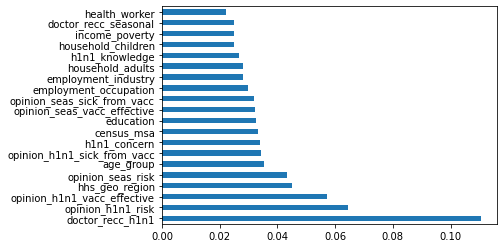

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features_df,y1)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features_df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.03179483 0.02715307 0.00750187 0.01712469 0.00902194 0.01276852
 0.01857678 0.01833255 0.01681628 0.01924045 0.087657   0.01941298
 0.01010956 0.01481157 0.00963104 0.03519306 0.03725686 0.03111044
 0.08125358 0.0919964  0.03303425 0.04142186 0.03163935 0.02041958
 0.0209317  0.02430749 0.0184471  0.01482646 0.02087261 0.0405781
 0.03108568 0.02717173 0.02488597 0.02755812 0.02605652]


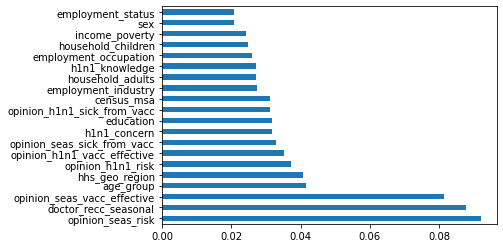

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features_df,y2)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features_df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [49]:
joined_df = features_df.join(y1)
print(joined_df.shape)
joined_df.head()

(26707, 36)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1,0,1,0,0,1,1,1,1,0.0,0.0,1,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2,2,0,1,1,0,0,1,2,1,2.0,0.0,2,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,3,1,0,0,0,0,1,0,3,2,0.0,0.0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,4,3,0,0,1,1,0,1,2,1,1.0,0.0,3,2,0


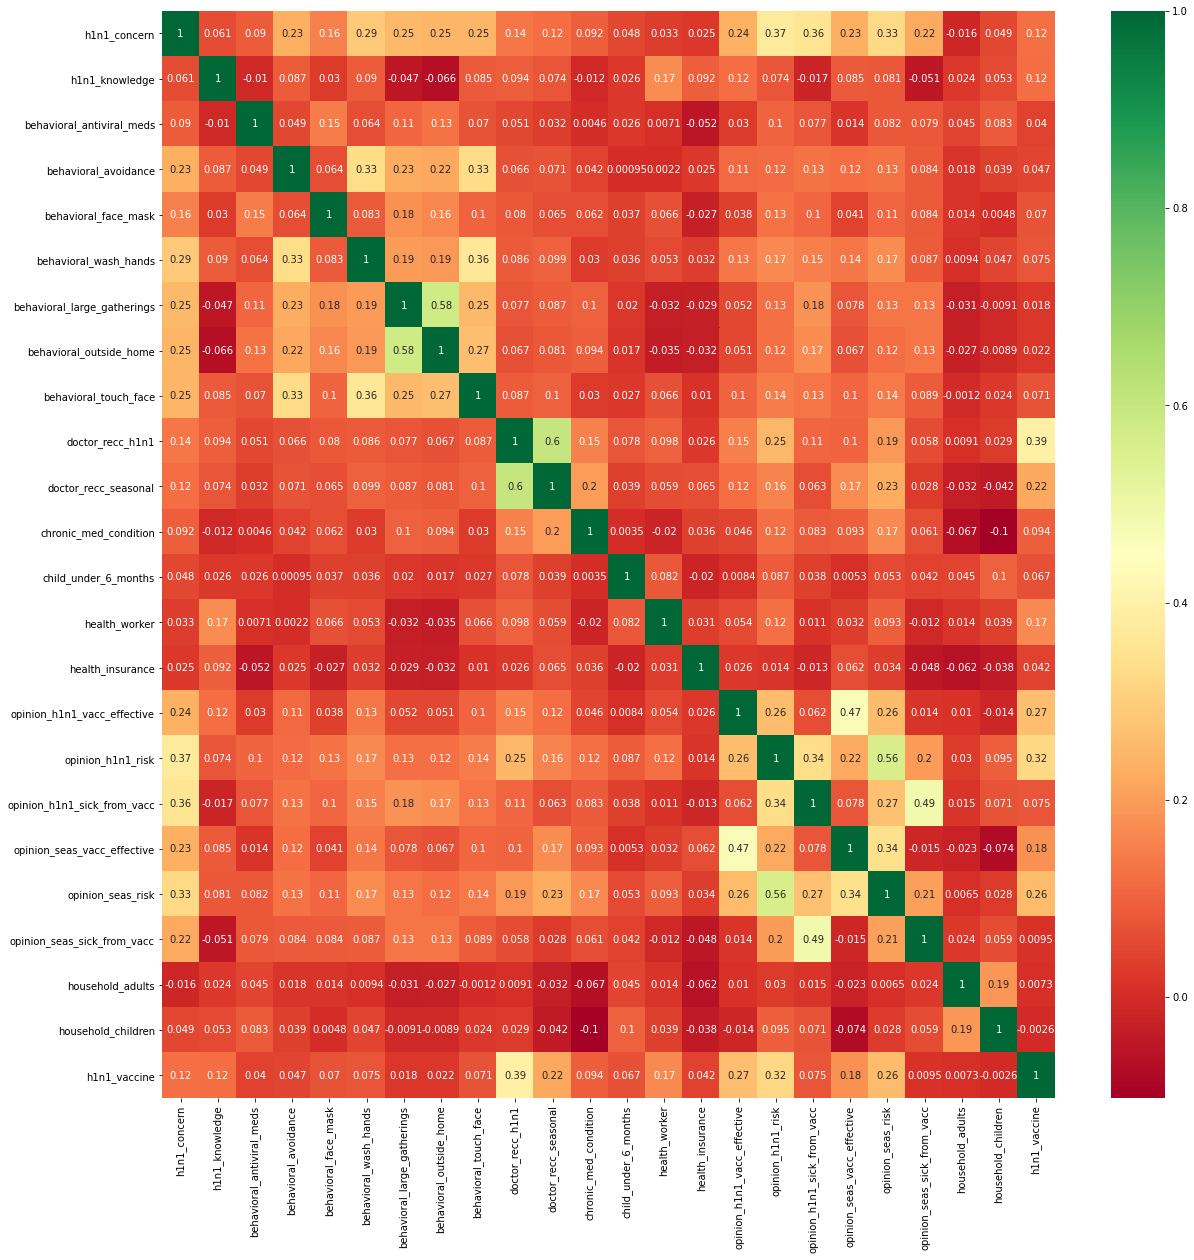

In [59]:
import seaborn as sns
corrmat = joined_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(joined_df[:].corr(),annot=True,cmap="RdYlGn")

In [53]:
joined_df1 = features_df.join(y2)
print(joined_df.shape)
joined_df.head()

(26707, 36)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1,0,1,0,0,1,1,1,1,0.0,0.0,1,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2,2,0,1,1,0,0,1,2,1,2.0,0.0,2,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,3,1,0,0,0,0,1,0,3,2,0.0,0.0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,4,3,0,0,1,1,0,1,2,1,1.0,0.0,3,2,0


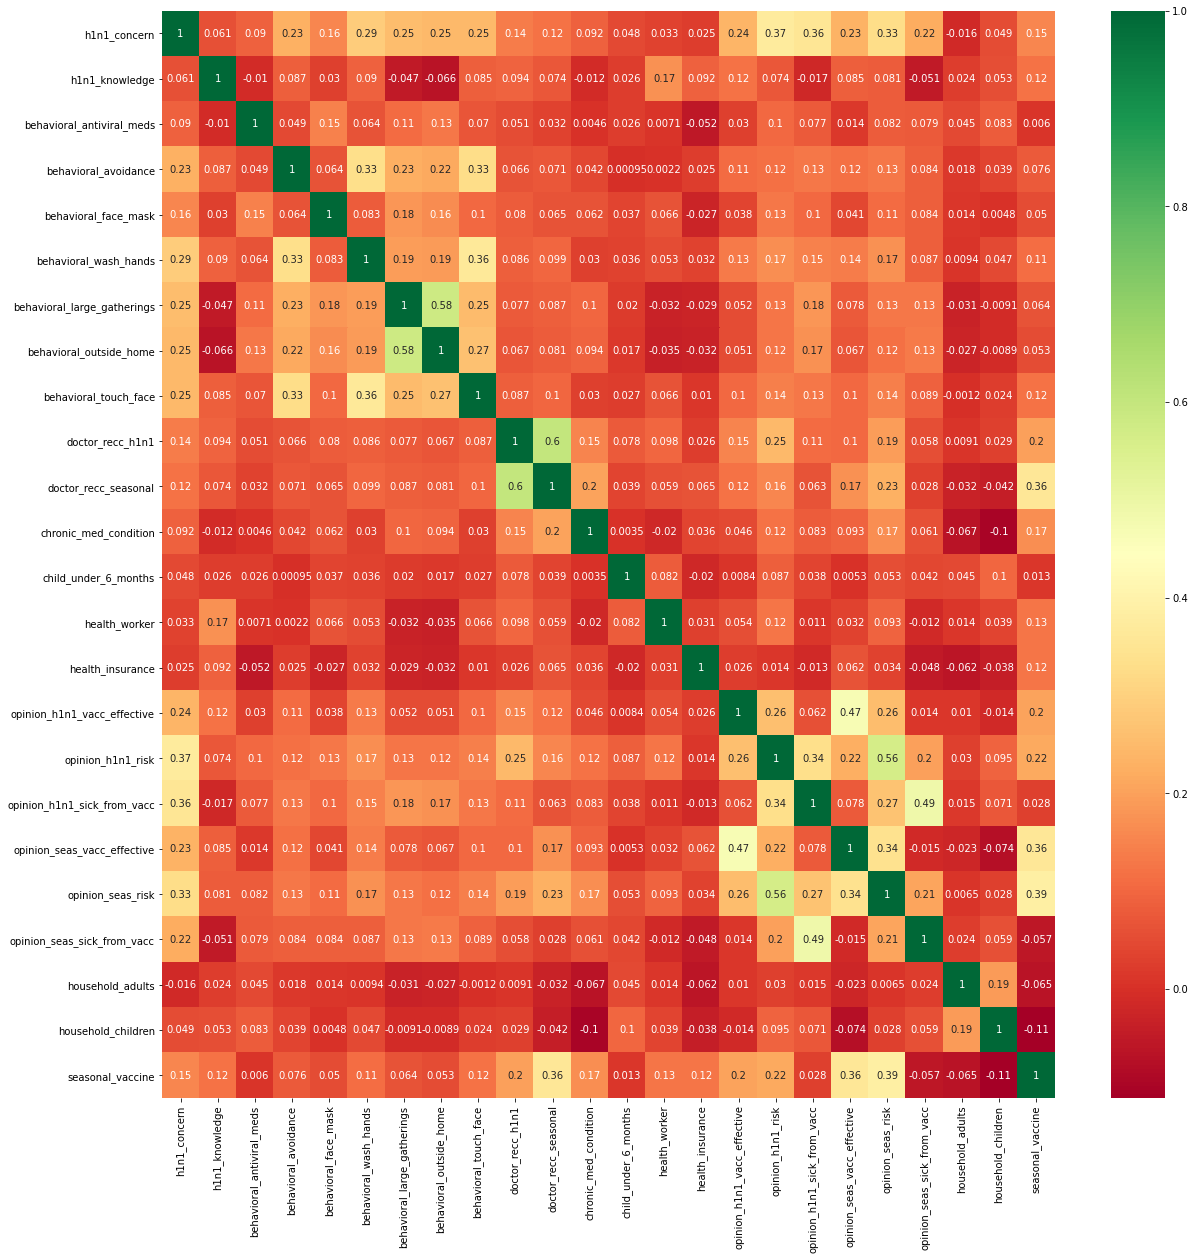

In [55]:
import seaborn as sns
corrmat = joined_df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(36,36))
#plot heat map
g=sns.heatmap(joined_df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
seasonal_features = features_df
h1n1_features = features_df

In [0]:
seasonal_features.drop(["opinion_seas_sick_from_vacc",""])

In [0]:
 estimator = CatBoostClassifier(iterations=50000, task_type="GPU",devices='0:1')

In [25]:
numeric_cols = h1n1_features.columns[h1n1_features.dtypes != "object"].values
print(len(numeric_cols))

26


In [37]:
numeric_cols1 = seasonal_features.columns[seasonal_features.dtypes != "object"].values
print(len(numeric_cols1))

30


In [0]:
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [0]:
preprocessor1 = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols1)
    ],
    remainder = "drop"
)

In [0]:
full_pipeline1 = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator),
])

In [0]:
full_pipeline2 = Pipeline([
    ("preprocessor", preprocessor1),
    ("estimator", estimator),
])

In [0]:
X_train, X_eval, y_train, y_eval = train_test_split(
    h1n1_features,
    y1,
    test_size=0.2,
    shuffle=True,
    stratify=labels_df,
    # random_state=RANDOM_SEED
)

In [168]:

# Train model
full_pipeline1.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels


Streaming output truncated to the last 5000 lines.
5001:	learn: 0.3552162	total: 3m	remaining: 3m
5002:	learn: 0.3552162	total: 3m	remaining: 3m
5003:	learn: 0.3552136	total: 3m	remaining: 2m 59s
5004:	learn: 0.3552131	total: 3m	remaining: 2m 59s
5005:	learn: 0.3552067	total: 3m	remaining: 2m 59s
5006:	learn: 0.3552032	total: 3m	remaining: 2m 59s
5007:	learn: 0.3551980	total: 3m	remaining: 2m 59s
5008:	learn: 0.3551913	total: 3m	remaining: 2m 59s
5009:	learn: 0.3551913	total: 3m	remaining: 2m 59s
5010:	learn: 0.3551879	total: 3m	remaining: 2m 59s
5011:	learn: 0.3551847	total: 3m	remaining: 2m 59s
5012:	learn: 0.3551842	total: 3m	remaining: 2m 59s
5013:	learn: 0.3551816	total: 3m	remaining: 2m 59s
5014:	learn: 0.3551735	total: 3m	remaining: 2m 59s
5015:	learn: 0.3551733	total: 3m	remaining: 2m 59s
5016:	learn: 0.3551733	total: 3m	remaining: 2m 59s
5017:	learn: 0.3551679	total: 3m	remaining: 2m 59s
5018:	learn: 0.3551679	total: 3m	remaining: 2m 59s
5019:	learn: 0.3551672	total: 3m	remain

NameError: ignored

In [169]:
preds = full_pipeline1.predict_proba(X_eval)
preds

array([[0.9627884 , 0.0372116 ],
       [0.80876253, 0.19123747],
       [0.65398753, 0.34601247],
       ...,
       [0.90449371, 0.09550629],
       [0.84684517, 0.15315483],
       [0.99184083, 0.00815917]])

In [172]:
roc_auc_score(y_eval, preds[:,1])

0.849021297627512

In [29]:
full_pipeline1.fit(h1n1_features, y1)

Streaming output truncated to the last 5000 lines.
45001:	learn: 0.3463245	total: 26m 42s	remaining: 2m 57s
45002:	learn: 0.3463240	total: 26m 42s	remaining: 2m 57s
45003:	learn: 0.3463240	total: 26m 42s	remaining: 2m 57s
45004:	learn: 0.3463225	total: 26m 42s	remaining: 2m 57s
45005:	learn: 0.3463219	total: 26m 42s	remaining: 2m 57s
45006:	learn: 0.3463218	total: 26m 42s	remaining: 2m 57s
45007:	learn: 0.3463219	total: 26m 42s	remaining: 2m 57s
45008:	learn: 0.3463219	total: 26m 42s	remaining: 2m 57s
45009:	learn: 0.3463207	total: 26m 42s	remaining: 2m 57s
45010:	learn: 0.3463205	total: 26m 42s	remaining: 2m 57s
45011:	learn: 0.3463201	total: 26m 42s	remaining: 2m 57s
45012:	learn: 0.3463201	total: 26m 42s	remaining: 2m 57s
45013:	learn: 0.3463201	total: 26m 42s	remaining: 2m 57s
45014:	learn: 0.3463201	total: 26m 42s	remaining: 2m 57s
45015:	learn: 0.3463201	total: 26m 42s	remaining: 2m 57s
45016:	learn: 0.3463185	total: 26m 42s	remaining: 2m 57s
45017:	learn: 0.3463185	total: 26m 42

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                 

In [60]:
h1n1_features.shape

(26707, 26)

In [40]:
full_pipeline2.fit(seasonal_features, y2)

Streaming output truncated to the last 5000 lines.
45001:	learn: 0.4338013	total: 27m 49s	remaining: 3m 5s
45002:	learn: 0.4338013	total: 27m 49s	remaining: 3m 5s
45003:	learn: 0.4337999	total: 27m 49s	remaining: 3m 5s
45004:	learn: 0.4337982	total: 27m 49s	remaining: 3m 5s
45005:	learn: 0.4337979	total: 27m 49s	remaining: 3m 5s
45006:	learn: 0.4337978	total: 27m 49s	remaining: 3m 5s
45007:	learn: 0.4337968	total: 27m 49s	remaining: 3m 5s
45008:	learn: 0.4337968	total: 27m 49s	remaining: 3m 5s
45009:	learn: 0.4337967	total: 27m 49s	remaining: 3m 5s
45010:	learn: 0.4337968	total: 27m 49s	remaining: 3m 5s
45011:	learn: 0.4337967	total: 27m 49s	remaining: 3m 4s
45012:	learn: 0.4337967	total: 27m 49s	remaining: 3m 4s
45013:	learn: 0.4337962	total: 27m 49s	remaining: 3m 4s
45014:	learn: 0.4337961	total: 27m 49s	remaining: 3m 4s
45015:	learn: 0.4337961	total: 27m 49s	remaining: 3m 4s
45016:	learn: 0.4337961	total: 27m 49s	remaining: 3m 4s
45017:	learn: 0.4337961	total: 27m 49s	remaining: 3m 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                 

In [53]:
test_probas = full_pipeline2.predict(seasonal_features)
test_probas

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
test_probas.shape

(26707,)

In [55]:
y1.shape

(26707,)

In [58]:
roc_auc_score(test_probas, y1)

0.6207105495559809